# classification

In [1]:
import pandas as pd
import numpy as np

In [6]:
# アメリカのアンテナが取得したデータが良好なものかどうかを分類
io_data=pd.read_csv('./data/ionosphere.data',header=None)
io_data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [20]:
from sklearn.cross_validation import train_test_split
X=io_data.values[:,:-1]
y=io_data.values[:,-1]

# データの準備
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=14)

In [42]:
 from  sklearn.neighbors import KNeighborsClassifier 
    
estimator= KNeighborsClassifier() 
estimator.fit(X_train,y_train)
y_predicted=estimator.predict(X_test)

acc=np.mean(y_predicted==y_test)*100
print(f'acc is {acc:.1f}')

acc is 86.4


In [60]:
# より精度を高めるため、cross-validationでデータを分割し、さまざまなパラメータをためす
from sklearn.cross_validation import cross_val_score
avg_scores=[]
all_scores=[]

pa_values=list(range(1,21))

for n_neighbors in pa_values:
    estimator=KNeighborsClassifier(n_neighbors=n_neighbors)
    scores=cross_val_score(estimator,X,y)
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [61]:
all_scores

[array([0.82051282, 0.79487179, 0.88888889]),
 array([0.83760684, 0.82905983, 0.91452991]),
 array([0.79487179, 0.79487179, 0.8974359 ]),
 array([0.81196581, 0.8034188 , 0.8974359 ]),
 array([0.82051282, 0.78632479, 0.86324786]),
 array([0.83760684, 0.8034188 , 0.88034188]),
 array([0.82905983, 0.72649573, 0.84615385]),
 array([0.83760684, 0.78632479, 0.88888889]),
 array([0.82905983, 0.74358974, 0.85470085]),
 array([0.82905983, 0.78632479, 0.88034188]),
 array([0.82905983, 0.67521368, 0.88034188]),
 array([0.82051282, 0.74358974, 0.88034188]),
 array([0.82905983, 0.72649573, 0.86324786]),
 array([0.82905983, 0.75213675, 0.88034188]),
 array([0.82051282, 0.71794872, 0.86324786]),
 array([0.82051282, 0.73504274, 0.88888889]),
 array([0.81196581, 0.68376068, 0.88034188]),
 array([0.81196581, 0.69230769, 0.88888889]),
 array([0.81196581, 0.65811966, 0.87179487]),
 array([0.81196581, 0.67521368, 0.88888889])]

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

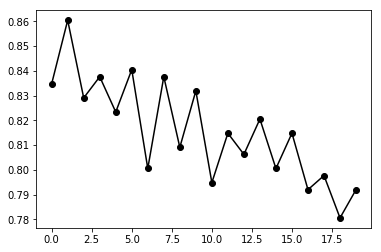

In [62]:
plt.plot(avg_scores,'k-o')

In [68]:
# パイプラインを生成し、データのスケールから実行までを一貫して行う
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaling_pipeline=Pipeline([('scale',MinMaxScaler()),('predict',KNeighborsClassifier())])
scores=cross_val_score(scaling_pipeline,X,y)
ave_acc=np.mean(scores)*100
print(f'scaled acc is {ave_acc:.1f}')

scaled acc is 82.3


/Users/hiroaki/.pyenv/versions/pycoon/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/hiroaki/.pyenv/versions/pycoon/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/hiroaki/.pyenv/versions/pycoon/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
